In [26]:
# Importing libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

In [27]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

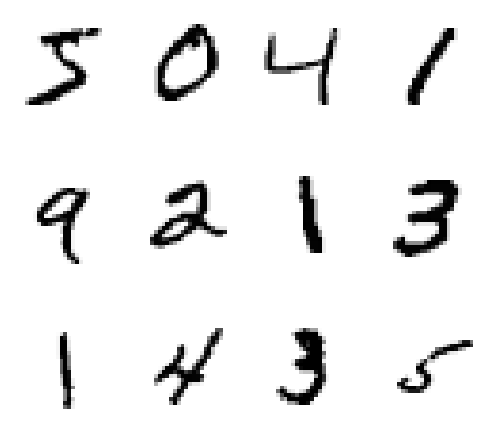

In [28]:
# Plot training data
plt.figure(figsize=(5, 5))
for k in range(12):
    plt.subplot(3, 4, k + 1)
    plt.imshow(X_train[k], cmap="Greys")
    plt.axis("off")
plt.tight_layout()
plt.show()

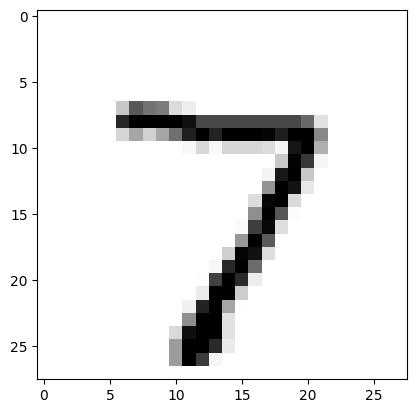

In [29]:
# Plot test image
plt.imshow(X_test[0], cmap="Greys")

In [30]:
# Preprocess data
X_train = X_train.reshape(60_000, 784).astype("float32")
X_test = X_test.reshape(10_000, 784).astype("float32")

In [31]:
X_train /= 255
X_test /= 255

In [32]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
# Converting integer label to one-hot
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [34]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [35]:
# Constructing Model
model = Sequential()
model.add(Dense(64, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

In [36]:
# Summary of model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Compile the model
model.compile(
    loss="categorical_crossentropy", optimizer=SGD(lr=0.1), metrics=["accuracy"]
)

In [38]:
model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=200,
    verbose=1,
    validation_data=(X_test, y_test),
)

Epoch 1/200
469/469 [==============================] - 1s 883us/step - loss: 2.1053 - accuracy: 0.4351 - val_loss: 1.8551 - val_accuracy: 0.6740
Epoch 2/200
469/469 [==============================] - 0s 775us/step - loss: 1.6541 - accuracy: 0.7082 - val_loss: 1.4494 - val_accuracy: 0.7549
Epoch 3/200
469/469 [==============================] - 0s 854us/step - loss: 1.3066 - accuracy: 0.7679 - val_loss: 1.1557 - val_accuracy: 0.8007
Epoch 4/200
469/469 [==============================] - 0s 820us/step - loss: 1.0658 - accuracy: 0.8048 - val_loss: 0.9592 - val_accuracy: 0.8272
Epoch 5/200
469/469 [==============================] - 0s 917us/step - loss: 0.9044 - accuracy: 0.8267 - val_loss: 0.8264 - val_accuracy: 0.8427
Epoch 6/200
469/469 [==============================] - 0s 817us/step - loss: 0.7931 - accuracy: 0.8411 - val_loss: 0.7330 - val_accuracy: 0.8549
Epoch 7/200
469/469 [==============================] - 0s 1ms/step - loss: 0.7132 - accuracy: 0.8518 - val_loss: 0.6645 - val_accu

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 408us/step - loss: 0.1801 - accuracy: 0.9476


[0.18014077842235565, 0.9476000070571899]